In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("train(1).csv")

In [3]:
df.shape

(200000, 202)

## Data analysis 

In [5]:
display(df.head())

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
display(df.describe())

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

## Exploratory data analysis (eda)


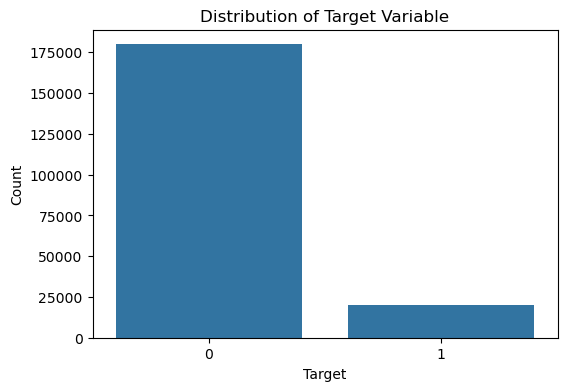

In [9]:
#Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### Insights:
* The distribution of target variable is strongly imbalanced, with more class 0 and very minimum class 1 .It shows that the model bias towards the majority class.

In [10]:
selected_features = ['var_0', 'var_1', 'var_2', 'var_3', 'var_4']

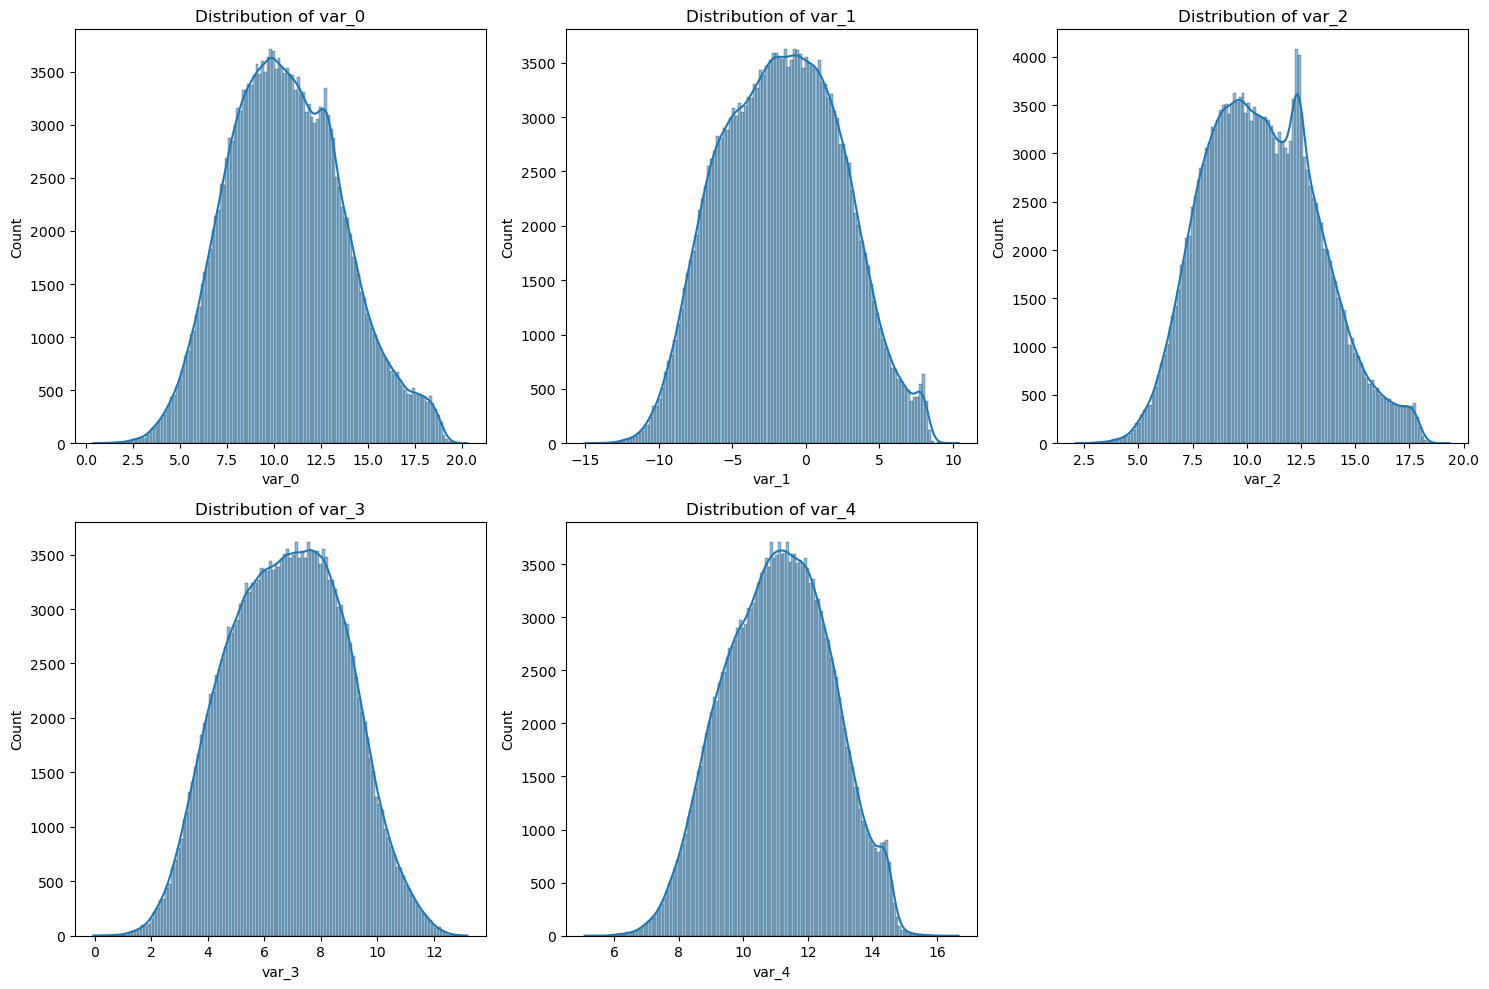

In [11]:
# Analyze distributions of selected features
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

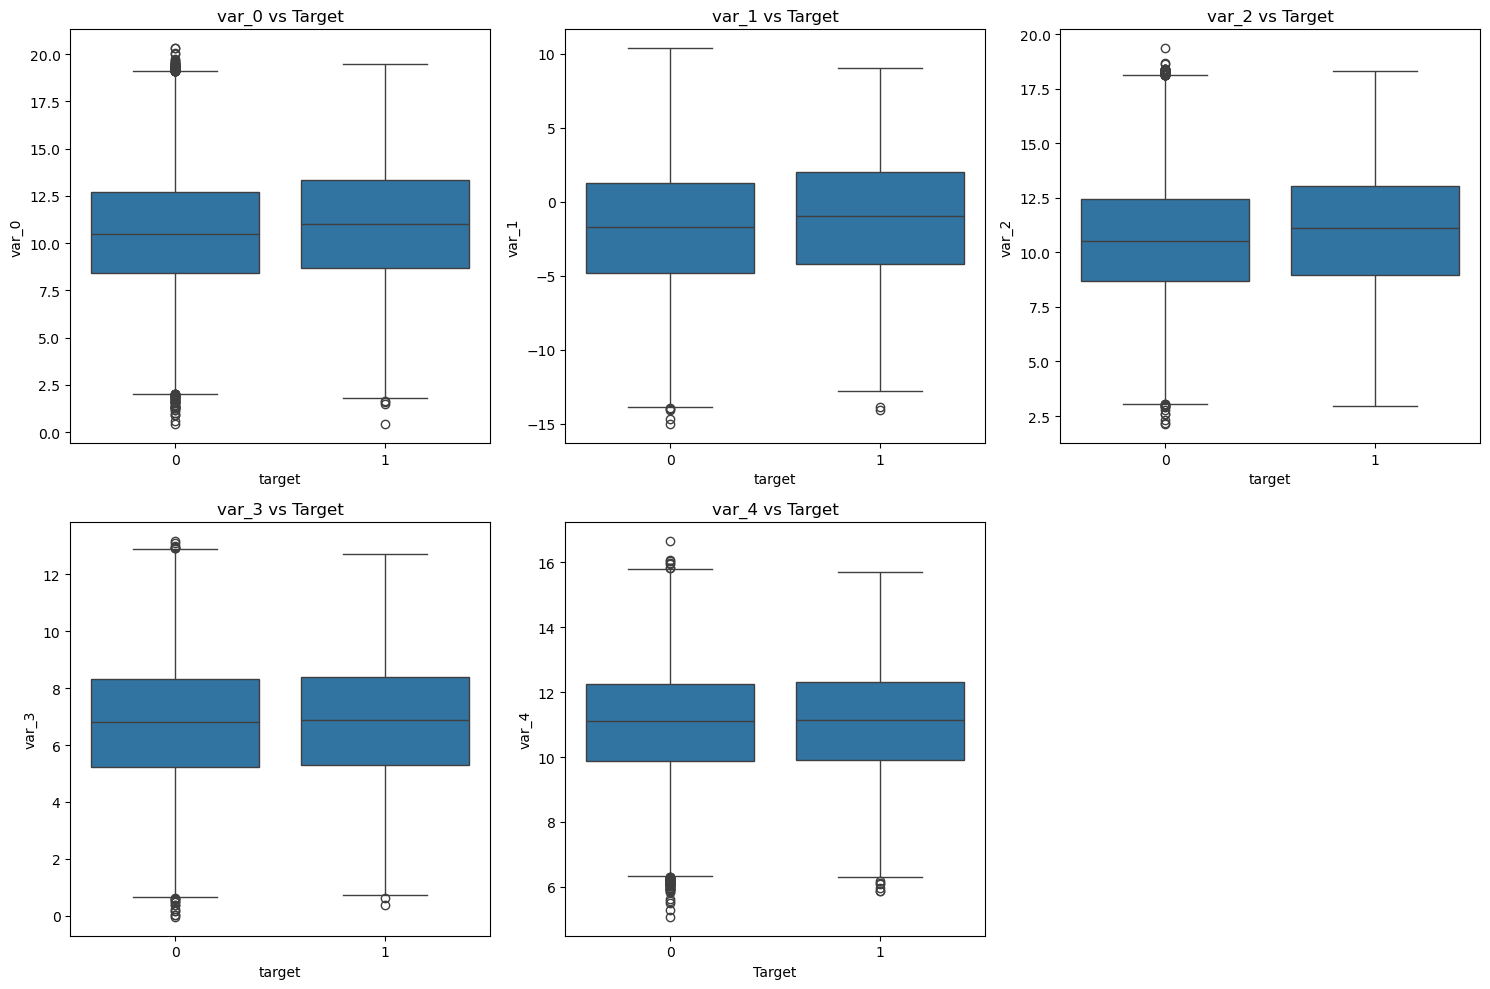

In [12]:
# Examine the relationship with target variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.xlabel('Target')
plt.ylabel(col)
plt.tight_layout()
plt.show()

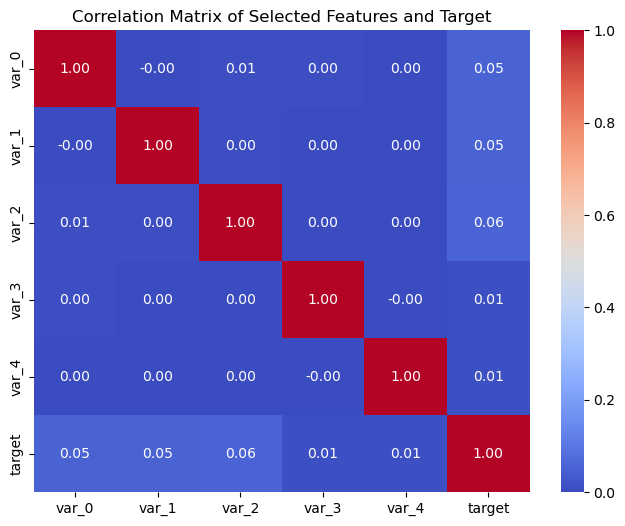

In [13]:
#correlation matrix for selected features
correlation_matrix = df[selected_features + ['target']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Features and Target')
plt.show()

* The dataset is anonymized ,so we can't understand the meaning or interpret the data without knowning which feature is what.   

## Data preprocessing


In [4]:
var_cols = [col for col in df.columns if 'var_' in col]

scaler = StandardScaler()
df[var_cols] = scaler.fit_transform(df[var_cols])

display(df.head())

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,...,0.263374,-1.149158,0.817469,-0.411013,0.168705,-1.578117,1.022131,-0.373968,-1.026398,0.214135
1,train_1,0,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,...,0.966611,0.093605,0.443623,1.908764,-0.817594,1.522342,1.067654,-0.129400,0.825417,0.505685
2,train_2,0,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,...,-0.072093,0.777997,-0.174131,-0.412316,1.151591,2.297370,-1.617906,-0.695141,-0.381449,0.356681
3,train_3,0,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,...,0.270216,-0.891456,-0.818468,-0.478548,1.607869,-0.789517,-0.959020,1.501744,0.697118,-0.543502
4,train_4,0,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,...,-1.036191,0.688988,-1.405987,1.468536,-1.501101,-0.958473,0.297627,0.645537,0.706318,-0.525375


In [5]:
# Over sampling technique is used because of imbalanced dataset
from imblearn.over_sampling import SMOTE

# Split the data for train and test
X = df.drop(['ID_code', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before SMOTE:", y_train.value_counts())

# Applying SMOTE on training data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())


Before SMOTE: target
0    143922
1     16078
Name: count, dtype: int64


  File "C:\Users\ventha\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ventha\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ventha\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ventha\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


After SMOTE: target
0    143922
1    143922
Name: count, dtype: int64


In [6]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (287844, 200)
Shape of X_test: (40000, 200)
Shape of y_train: (287844,)
Shape of y_test: (40000,)


## Model selection and training

In [7]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Model Evaluation


In [8]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "XGBoost": xgb_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print(f"***{name}*** ")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
    print("*" * 20)

***Logistic Regression*** 
Accuracy: 0.78945
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     35980
           1       0.29      0.76      0.42      4020

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000

Confusion Matrix:
 [[28521  7459]
 [  963  3057]]
ROC-AUC Score: 0.858338283568262
********************
***Random Forest*** 
Accuracy: 0.8954
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     35980
           1       0.28      0.03      0.05      4020

    accuracy                           0.90     40000
   macro avg       0.59      0.51      0.50     40000
weighted avg       0.84      0.90      0.85     40000

Confusion Matrix:
 [[35708   272]
 [ 3912   108]]
ROC-AUC Score: 0.7036992255233008
********************
***Gra

* Among multiple models trained based on evaluation matrics , ***LogisticRegression*** is selected as ***Best Model*** still RandomForest gives the best accuracy but the Recall is very low ,the main objective is to catching more positives (class 1). 

## Fine-tuning Logistic Regression 

In [9]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],   
    'penalty': ['l2'],         
    'solver': ['lbfgs'],       
    'max_iter': [1000]         
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=param_grid_lr,
    scoring='roc_auc',   
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search_lr.fit(X_train, y_train)

# Best parameters
print("Best Logistic Regression Params:", grid_search_lr.best_params_)
print("Best ROC-AUC (CV):", grid_search_lr.best_score_)

# Evaluate best model on test dataset
best_log_model = grid_search_lr.best_estimator_
y_pred_log = best_log_model.predict(X_test)
y_pred_proba_log = best_log_model.predict_proba(X_test)[:, 1]

print("\n--- Best Logistic Regression Model Evaluation on Test Set ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Logistic Regression Params: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best ROC-AUC (CV): 0.878704784637451

--- Best Logistic Regression Model Evaluation on Test Set ---
Accuracy: 0.789475
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     35980
           1       0.29      0.76      0.42      4020

    accuracy                           0.79     40000
   macro avg       0.63      0.78      0.65     40000
weighted avg       0.90      0.79      0.83     40000

Confusion Matrix:
 [[28522  7458]
 [  963  3057]]
ROC-AUC Score: 0.8583406134972718


 ## Final Model :

In [10]:
import pickle

# Save the fine-tuned logistic model
with open("final_logistic_model.pkl", "wb") as f:
    pickle.dump(best_log_model, f)

print(" Model saved as final_logistic_model.pkl")


 Model saved as final_logistic_model.pkl


### Summary :
* ***Fine-tuned Logistic Regression*** is selected as the ***Final Model*** for customer transaction prediction.
* Because it gives high recall on the minority class (class 1).
* Achieves a stable ROC-AUC across CV.
* Uses a strong regularization param (C=0.01) to prevent model from overfit, making it more reliable than the base Logistic Regression.